In [ ]:
!pip install pandas matplotlib seaborn scikit-learn plotly

In [ ]:
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

# Display first few rows of each dataset
customers.head(), products.head(), transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067   2024-04-25 7:38:55    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import plotly.express as px

## Task 1: Exploratory Data Analysis


In [ ]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print(merged_data.info())
print(merged_data.describe())
print(merged_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   68

In [ ]:
# Check for missing values
print(merged_data.isnull().sum())


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


<ipython-input-31-5054b826fe41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


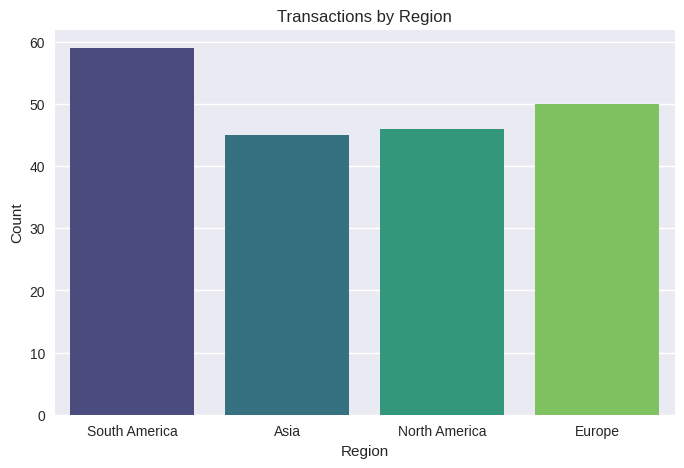

In [ ]:
# Visualization 1: Distribution of Transactions by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

<ipython-input-32-02059b0fa64d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y="ProductName", x="TotalValue", palette="plasma")


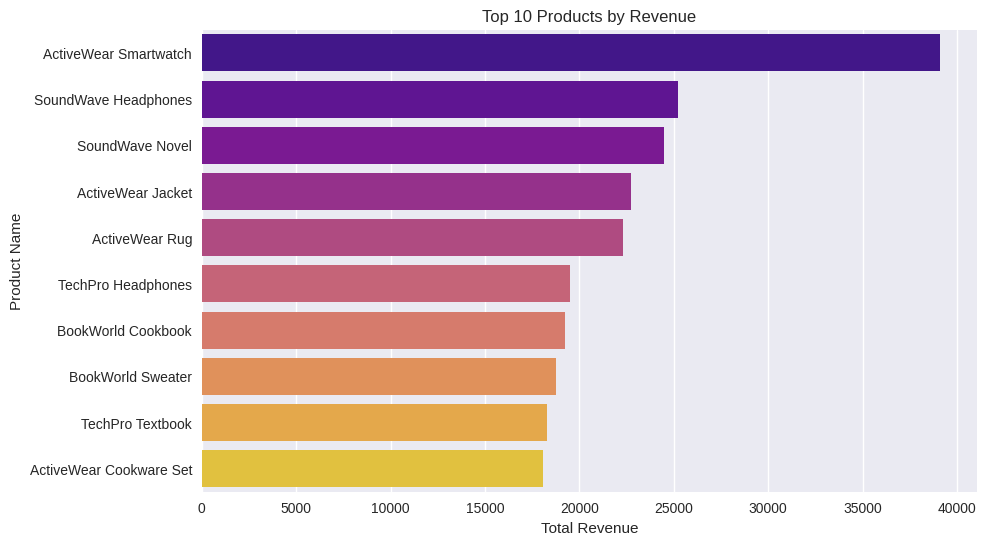

In [ ]:
# Visualization 2: Top 10 Products by Total Revenue
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, y="ProductName", x="TotalValue", palette="plasma")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.show()

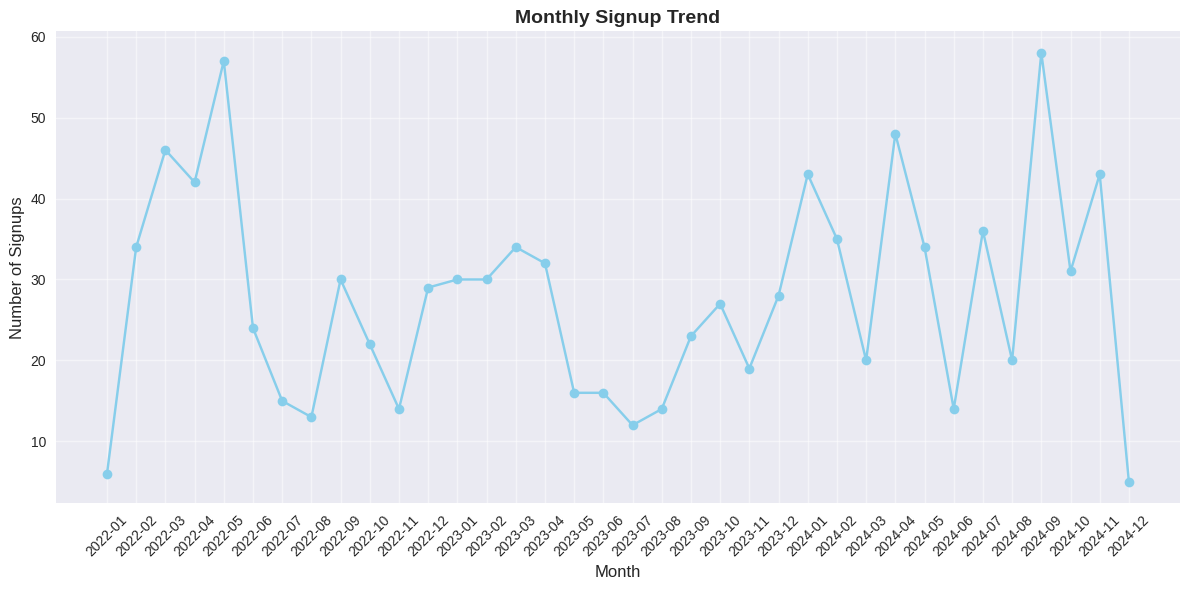

In [ ]:
## Analyze Customer Signup Dates
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
signup_monthly = merged_data['SignupDate'].dt.to_period('M').value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signup_monthly.index.astype(str), signup_monthly.values, marker='o', linestyle='-', color='skyblue')
ax.set_title("Monthly Signup Trend", fontsize=14, weight='bold')
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Number of Signups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

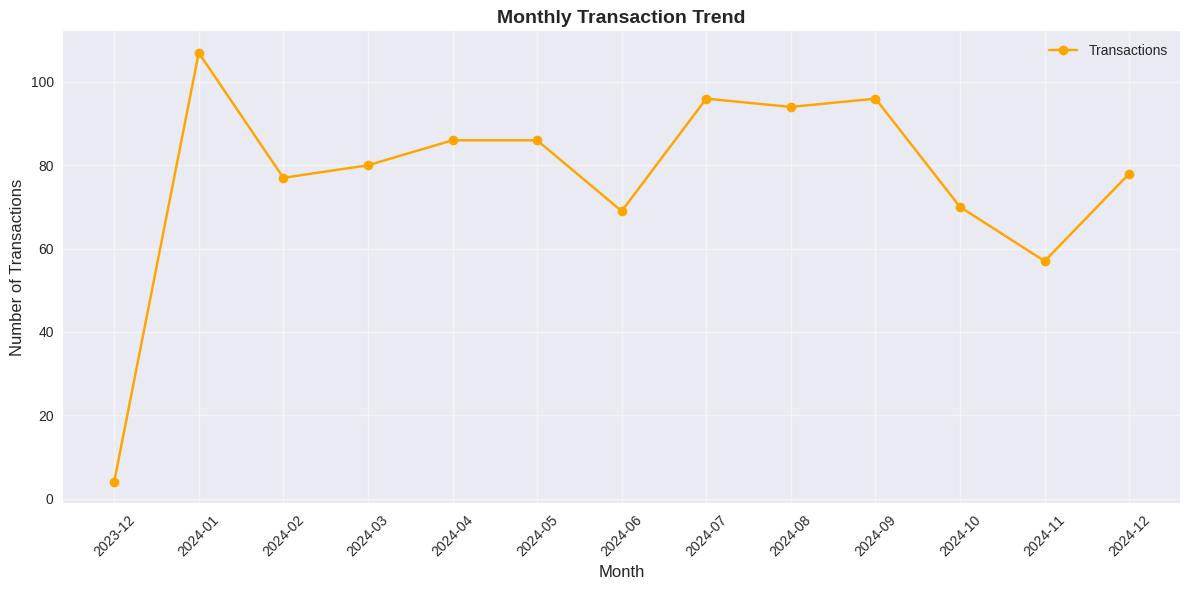

In [ ]:
## Analyze Transaction Date Trends
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
transaction_trend = merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(transaction_trend.index.astype(str), transaction_trend.values, marker='o', color='orange', label='Transactions')
plt.title("Monthly Transaction Trend", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-36-a8a94b396e03>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x="Category", y="TotalValue", palette="coolwarm")


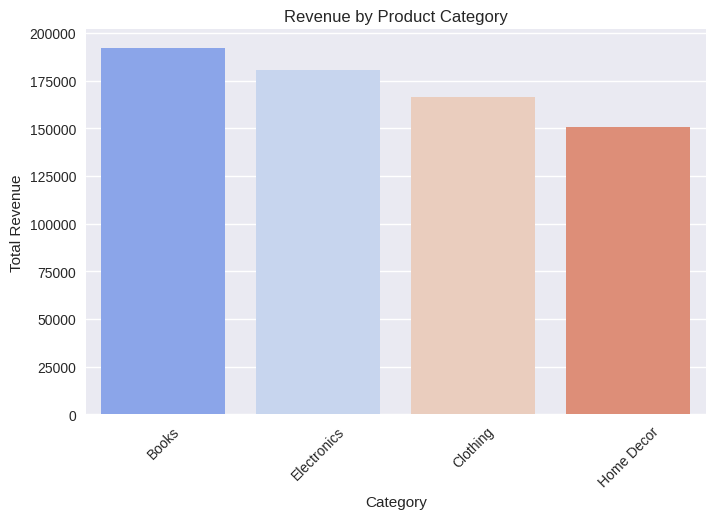

In [ ]:
# Analyze Category-wise Revenue
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=category_revenue, x="Category", y="TotalValue", palette="coolwarm")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

### ## Task 2: Lookalike Model

In [ ]:
# Build customer profile matrix (based on transactions and products)
customer_profile = merged_data.pivot_table(index="CustomerID", columns="Category", values="TotalValue", aggfunc="sum", fill_value=0)

In [ ]:
# Compute similarity matrix
similarity_matrix = cosine_similarity(customer_profile)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profile.index, columns=customer_profile.index)

In [ ]:
# Generate Lookalike recommendations
lookalike_dict = {}
for customer in customer_profile.index[:20]:
    similar_customers = similarity_df[customer].sort_values(ascending=False).iloc[1:4]
    lookalike_dict[customer] = similar_customers.to_dict()

In [ ]:
# Save to CSV
lookalike_df = pd.DataFrame.from_dict(lookalike_dict, orient='index')
lookalike_df.to_csv("Lookalike.csv")

**#### Task 3: Customer Segmentation**

In [ ]:
# Prepare data for clustering
features = merged_data.groupby("CustomerID").agg({"TotalValue": "sum", "Quantity": "sum"}).reset_index()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop("CustomerID", axis=1))


In [ ]:
# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Add cluster labels
features["Cluster"] = kmeans.labels_

In [ ]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.776661054409607


In [ ]:
# Visualize clusters
fig = px.scatter(features, x="TotalValue", y="Quantity", color="Cluster", title="Customer Segmentation", template="plotly_dark")
fig.show()

In [ ]:
# Analyze Cluster Characteristics
cluster_summary = features.groupby("Cluster").agg({"TotalValue": ["mean", "sum"], "Quantity": ["mean", "sum"]})
print(cluster_summary)

          TotalValue              Quantity     
                mean        sum       mean  sum
Cluster                                        
0        7265.974000   72659.74  26.900000  269
1        2529.708732  179609.32   9.676056  687
2        5520.266154  215290.38  19.538462  762
3         864.523929   24206.67   3.964286  111
4        3886.851961  198229.45  13.882353  708


In [ ]:
# Save EDA visuals, clustering outputs, and PDFs
features.to_csv("Clustering_Results.csv", index=False)